# Feature Selection and its Effect on Model Performance

In this notebook, we will explore feature selection techniques and their impact on model performance for both classification and regression tasks. We will work with two datasets:

### Wine Dataset (Classification Task)
– We will select the most important features and train a Random Forest Classifier to evaluate performance.
### Diabetes Dataset (Regression Task) 
– We will select relevant features and train a Linear Regression Model to assess accuracy and computational efficiency.

### Steps:

- Load and explore the dataset.
- Perform feature selection using: Mutual Information (MI) for feature relevance estimation.
- Train machine learning models on: Original features (baseline performance) and Selected features using MI.
- Compare results in terms of: Classification accuracy (for Wine dataset)., Mean Squared Error (MSE) and R² score (for Diabetes dataset).
- Analyze the difference in training time for the Diabetes dataset when using all features versus selected features for model training.


In [14]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data[wine.feature_names]
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Selection using ANOVA F-test
"""f_selector = SelectKBest(score_func=f_classif, k=5)
X_train_f_selected = f_selector.fit_transform(X_train, y_train)
X_test_f_selected = f_selector.transform(X_test)

# Display selected features and scores
print("\nANOVA F-test Scores:")
for feature, score in zip(wine.feature_names, f_selector.scores_):
    print(f"{feature}: {score:.2f}")
"""
# Feature Selection using Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=7)
X_train_mi_selected = mi_selector.fit_transform(X_train, y_train)
X_test_mi_selected = mi_selector.transform(X_test)

# Display mutual information scores
print("\nMutual Information Scores:")
for feature, score in zip(wine.feature_names, mi_selector.scores_):
    print(f"{feature}: {score:.2f}")

# Train and evaluate a Random Forest model on original and selected features
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

"""rf_f_selected = RandomForestClassifier(random_state=42)
rf_f_selected.fit(X_train_f_selected, y_train)
y_pred_f_selected = rf_f_selected.predict(X_test_f_selected)
"""
rf_mi_selected = RandomForestClassifier(random_state=42)
rf_mi_selected.fit(X_train_mi_selected, y_train)
y_pred_mi_selected = rf_mi_selected.predict(X_test_mi_selected)

# Evaluate the performance
print("\nPerformance on Original Features:")
print(classification_report(y_test, y_pred_original))

# print("\nPerformance on ANOVA F-test Selected Features:")
# print(classification_report(y_test, y_pred_f_selected))

print("\nPerformance on Mutual Information Selected Features:")
print(classification_report(y_test, y_pred_mi_selected))


Dataset Preview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

In [12]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the Diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data[diabetes.feature_names]
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using F-test for Regression
"""f_selector = SelectKBest(score_func=f_regression, k=5)
X_train_f_selected = f_selector.fit_transform(X_train, y_train)
X_test_f_selected = f_selector.transform(X_test)
selected_features_f = [feature for feature, mask in zip(diabetes.feature_names, f_selector.get_support()) if mask]
"""
# Feature Selection using Mutual Information for Regression
mi_selector = SelectKBest(score_func=mutual_info_regression, k=4)
X_train_mi_selected = mi_selector.fit_transform(X_train, y_train)
X_test_mi_selected = mi_selector.transform(X_test)
selected_features_mi = [feature for feature, mask in zip(diabetes.feature_names, mi_selector.get_support()) if mask]

# Train and evaluate Linear Regression on original features
start_time = time.time()
lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)
time_original = time.time() - start_time

# Train and evaluate Linear Regression on F-test-selected features
"""start_time = time.time()
lr_f_selected = LinearRegression()
lr_f_selected.fit(X_train_f_selected, y_train)
y_pred_f_selected = lr_f_selected.predict(X_test_f_selected)
time_f_selected = time.time() - start_time
"""
# Train and evaluate Linear Regression on Mutual Information-selected features
start_time = time.time()
lr_mi_selected = LinearRegression()
lr_mi_selected.fit(X_train_mi_selected, y_train)
y_pred_mi_selected = lr_mi_selected.predict(X_test_mi_selected)
time_mi_selected = time.time() - start_time

# Display Selected Features and Scores
"""print("\nF-test Selected Features and Scores:")
for feature, score in zip(diabetes.feature_names, f_selector.scores_):
    print(f"{feature}: {score:.2f}")
print(f"Number of Features Selected (F-test): {len(selected_features_f)}")
print(f"Selected Features (F-test): {selected_features_f}")
"""
print("\nMutual Information Selected Features and Scores:")
for feature, score in zip(diabetes.feature_names, mi_selector.scores_):
    print(f"{feature}: {score:.2f}")
print(f"Number of Features Selected (Mutual Information): {len(selected_features_mi)}")
print(f"Selected Features (Mutual Information): {selected_features_mi}")

# Evaluate the performance
print("\nPerformance on Original Features:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_original):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_original):.2f}")
print(f"Training Time: {time_original:.4f} seconds")

"""print("\nPerformance on F-test Selected Features:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_f_selected):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_f_selected):.2f}")
print(f"Training Time: {time_f_selected:.4f} seconds")
"""
print("\nPerformance on Mutual Information Selected Features:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_mi_selected):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_mi_selected):.2f}")
print(f"Training Time: {time_mi_selected:.4f} seconds")



Dataset Preview:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Mutual Information Selected Features and Scores:
age: 0.01
sex: 0.03
bmi: 0.25
bp: 0.08
s1: 0.03
s2: 0.09
s3: 0.05
s4: 0.11
s5: 0.18
s6: 0.09
Number of Features Selected (Mutual Information): 4
Selected Features (Mutual Information): ['bmi', 's4', 's5', 's6']

Performance on Ori

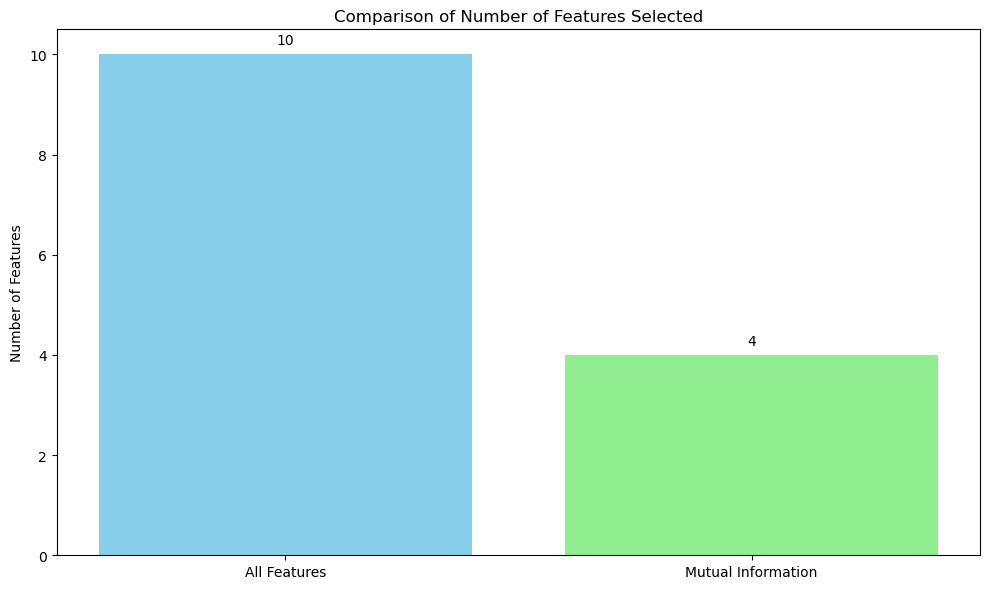

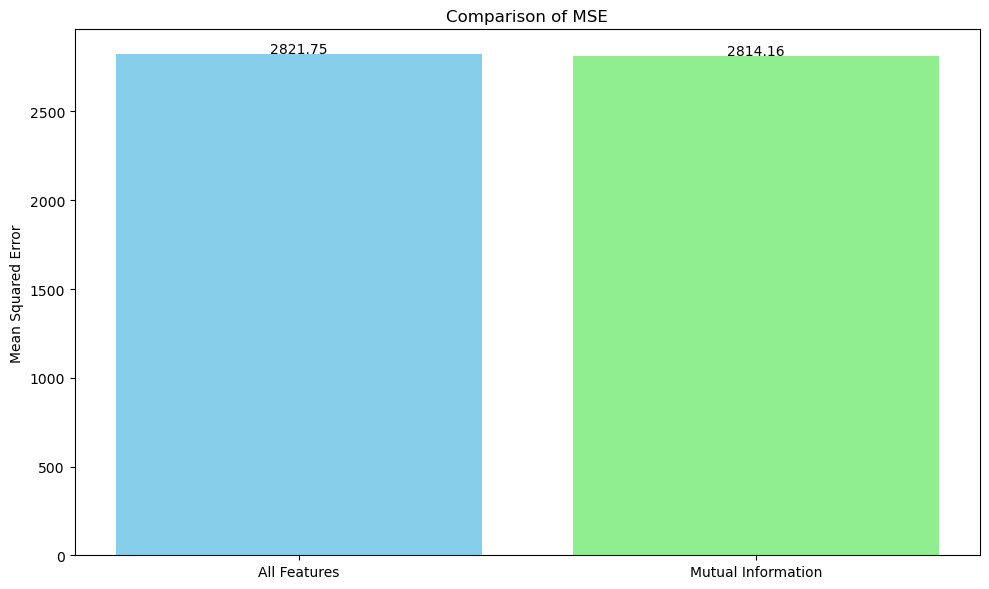

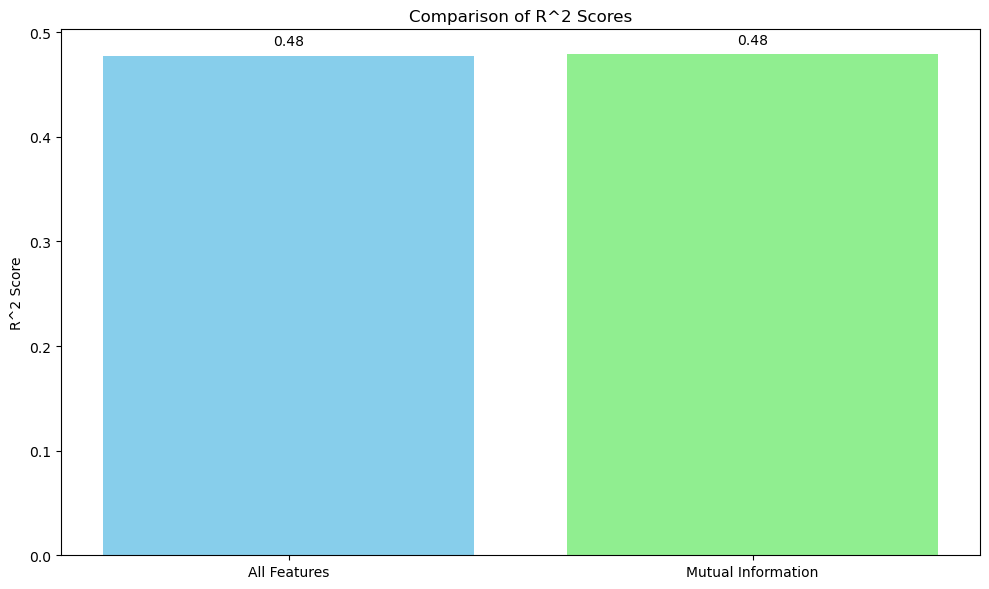

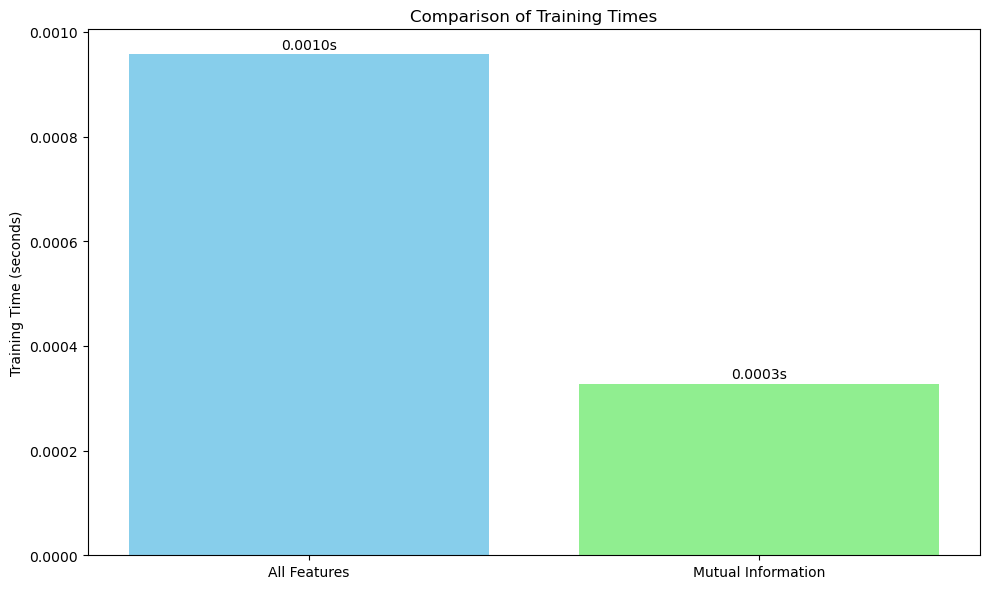

In [13]:
import matplotlib.pyplot as plt

# Data for bar plots
categories = ["All Features", "Mutual Information"]
num_features = [X.shape[1], len(selected_features_mi)]
mse_values = [
    mean_squared_error(y_test, y_pred_original),
    mean_squared_error(y_test, y_pred_mi_selected),
]
r2_values = [
    r2_score(y_test, y_pred_original),
    r2_score(y_test, y_pred_mi_selected),
]
training_times = [time_original, time_mi_selected]

# Plotting the number of selected features
plt.figure(figsize=(10, 6))
plt.bar(categories, num_features, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Number of Features")
plt.title("Comparison of Number of Features Selected")
for i, value in enumerate(num_features):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(categories, mse_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE")
for i, value in enumerate(mse_values):
    plt.text(i, value + 5, f"{value:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the R^2 values
plt.figure(figsize=(10, 6))
plt.bar(categories, r2_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("R^2 Score")
plt.title("Comparison of R^2 Scores")
for i, value in enumerate(r2_values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the training times
plt.figure(figsize=(10, 6))
plt.bar(categories, training_times, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Training Time (seconds)")
plt.title("Comparison of Training Times")
for i, value in enumerate(training_times):
    plt.text(i, value + 0.00001, f"{value:.4f}s", ha='center', fontsize=10)
plt.tight_layout()
plt.show()
